In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
from geomstats.geometry.hyperboloid import Hyperboloid
from geomstats.geometry.poincare_half_space import PoincareHalfSpace
from geomstats.geometry.minkowski import MinkowskiMetric
import geomstats.visualization as viz
import matplotlib.pyplot as plt

INFO: Using numpy backend


In [3]:
Hb = Hyperboloid(2)
PHS = PoincareHalfSpace(2)
p_hb = Hb.random_point()
p_hp = PHS.random_point()
p = np.hstack((1, p_hp))
p_hp2hb = Hb.projection(p)

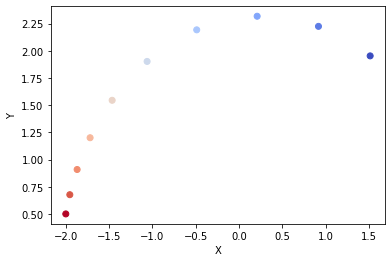

In [16]:
pi = np.array([1.513381  , 1.95356851]) 
pf = np.array([[-2. ,  0.5]])
geodesic = PHS.metric.geodesic(pi, pf)
t = np.linspace(0,1,num=10)
gt = geodesic(t)

fig, ax = plt.subplots()
hplane = viz.PoincareHalfPlane()
ax = hplane.set_ax(ax)
hplane.add_points(gt)
hplane.draw(ax,c=t,cmap='coolwarm')
plt.show()

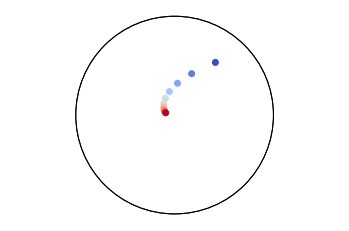

In [17]:
fig, ax = plt.subplots()
disk = viz.PoincareDisk()
circle = plt.Circle((0, 0), radius=1.0, color="black", fill=False)
ax.add_patch(circle)
gt_time = np.hstack(((1+10*t).reshape(10,1), gt))
p_hp2hb = Hb.projection(gt_time)
disk.add_points(p_hp2hb)
disk.draw(ax,c=t,cmap='coolwarm')
ax.axis('equal')
ax.axis('off')
plt.show()